In [1]:
from datetime import datetime

In [2]:
now= datetime.now()

In [3]:
now

datetime.datetime(2024, 3, 16, 12, 17, 53, 147241)

In [7]:
now.year,now.month,now.day, now.second, now.microsecond

(2024, 3, 16, 53, 147241)

In [5]:
delta=datetime(2011,1,7) - datetime(2024,6,24,15,6,10)
delta

datetime.timedelta(days=-4918, seconds=32030)

In [8]:
from datetime import timedelta

In [10]:
start = datetime(2024,1,1)
end=start+timedelta(days=5)
end

datetime.datetime(2024, 1, 6, 0, 0)

In [12]:
now.date()

datetime.date(2024, 3, 16)

In [15]:
now.tzinfo

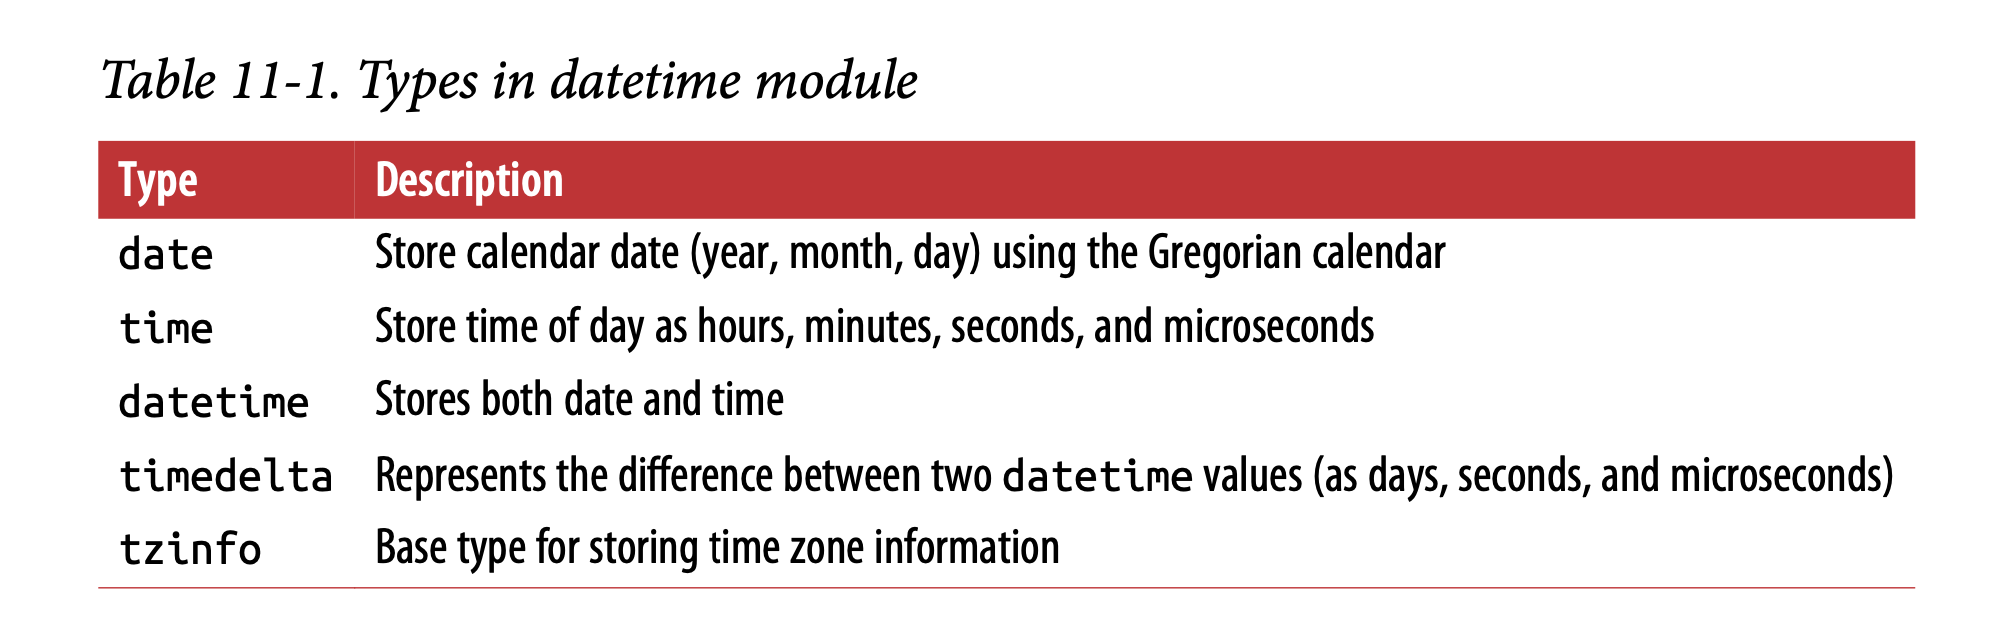

Converting between datetime and String

In [16]:
stamp= datetime(2024,1,1)

str(stamp)

'2024-01-01 00:00:00'

In [19]:
stamp.strftime('%Y-%m-%d')

'2024-01-01'

In [24]:
datetime.now().strftime('%Y-%M-%D') # M is for minute , D is invalid

'03/16/24'

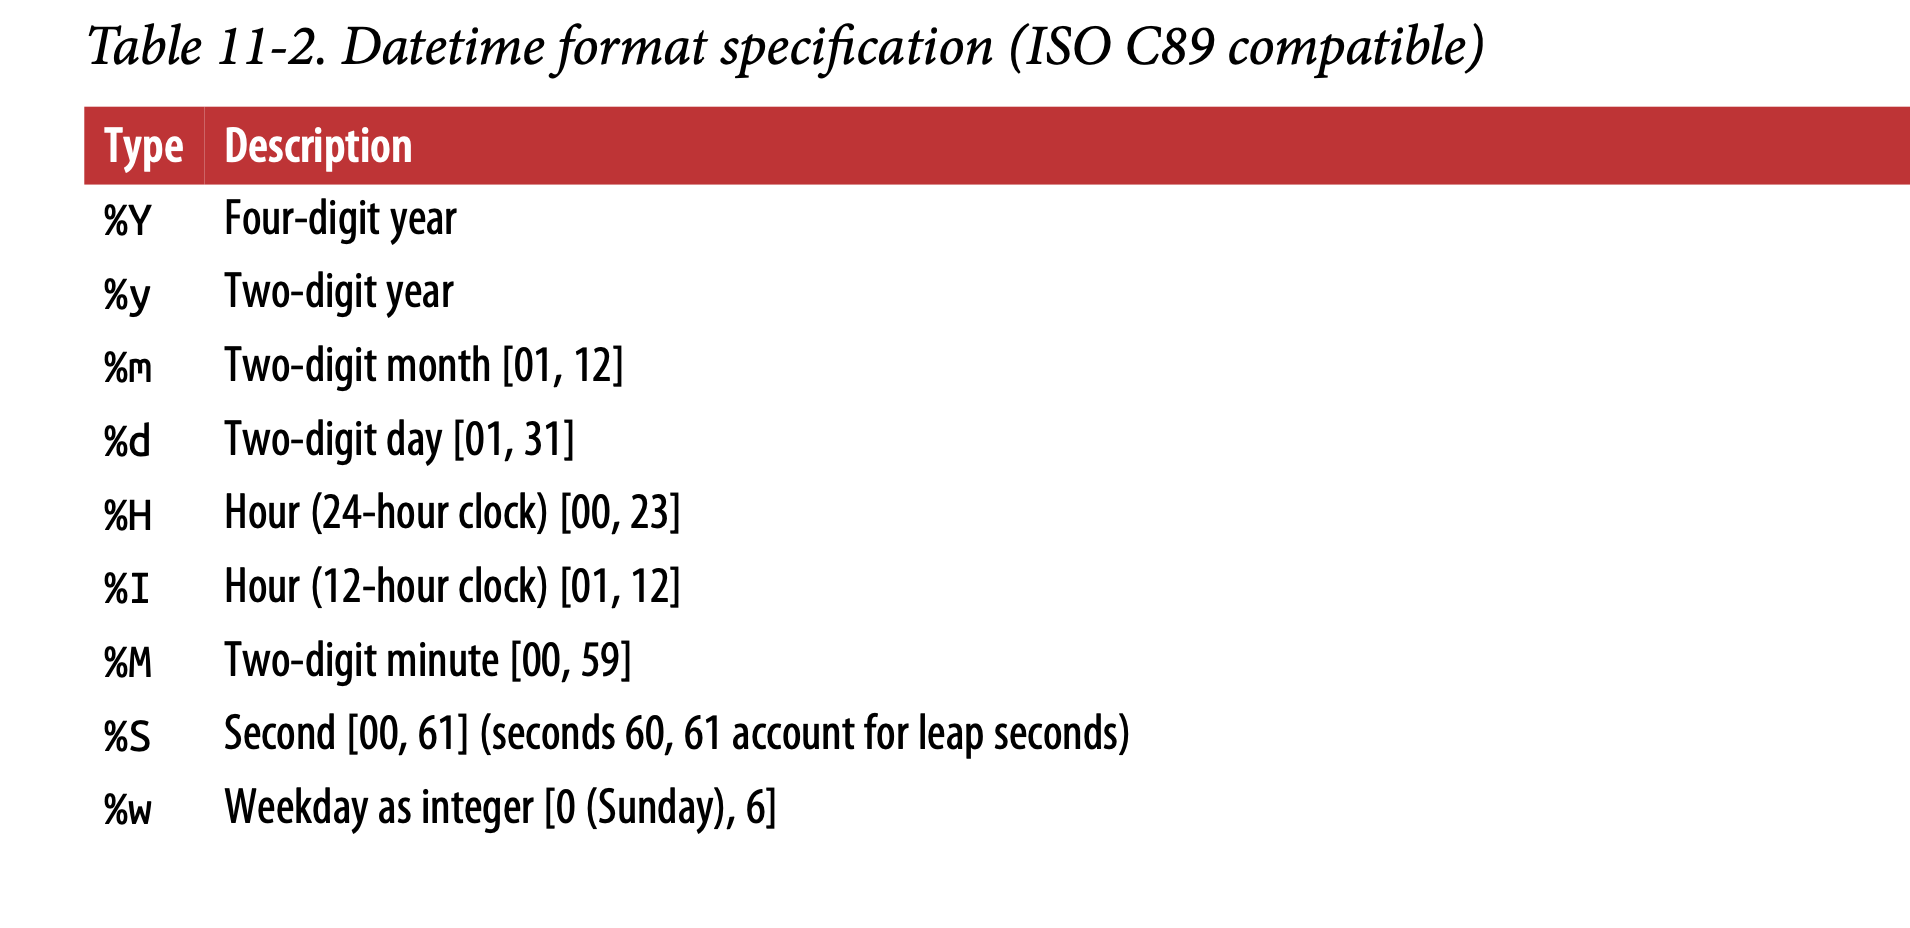

In [25]:
datetime.now().strftime('%F')

'2024-03-16'

In [26]:
datetime.now().strftime('%D')

'03/16/24'

In [ ]:
# Shortcuts

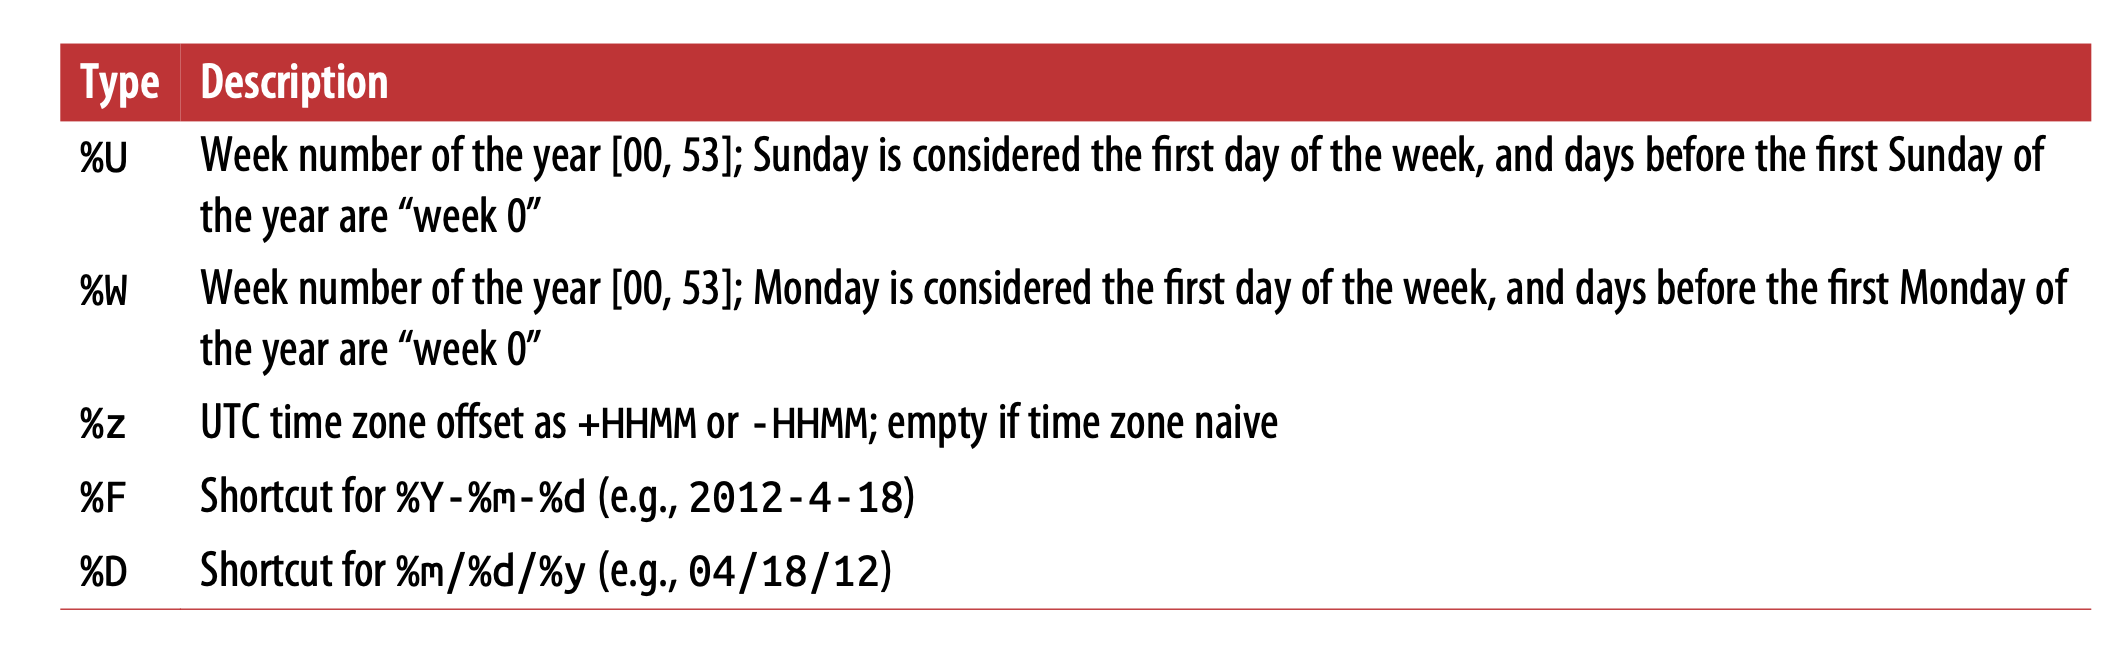

In [31]:
value= '2023-01-01'
datetime.strptime(value,'%Y-%m-%d')  # '%Y-%m-%d' has to match the original value to be converted

datetime.datetime(2023, 1, 1, 0, 0)

In [32]:
datestrs =  ['7/6/2011', '8/6/2011']

In [34]:
[datetime.strptime(date, '%m/%d/%Y') for date in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

datetime.strptime is a good way to parse a date with a known format.\
However, it can be a bit annoying to have to write a format spec each time, especially for common date formats.\
In this case, you can use the parser.parse method in the third-party dateutil package (this is installed automatically when you install pandas):

In [35]:
from dateutil.parser import parse

In [36]:
[parse(date) for date in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [37]:
parse('6/11/2023', dayfirst=True)

datetime.datetime(2023, 11, 6, 0, 0)

In [38]:
#pd.to_datetime is very flexible

In [41]:
import pandas as pd

In [42]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']

pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [44]:
idx=pd.to_datetime(datestrs+ [None])

In [45]:
pd.isna(idx)

array([False, False,  True])

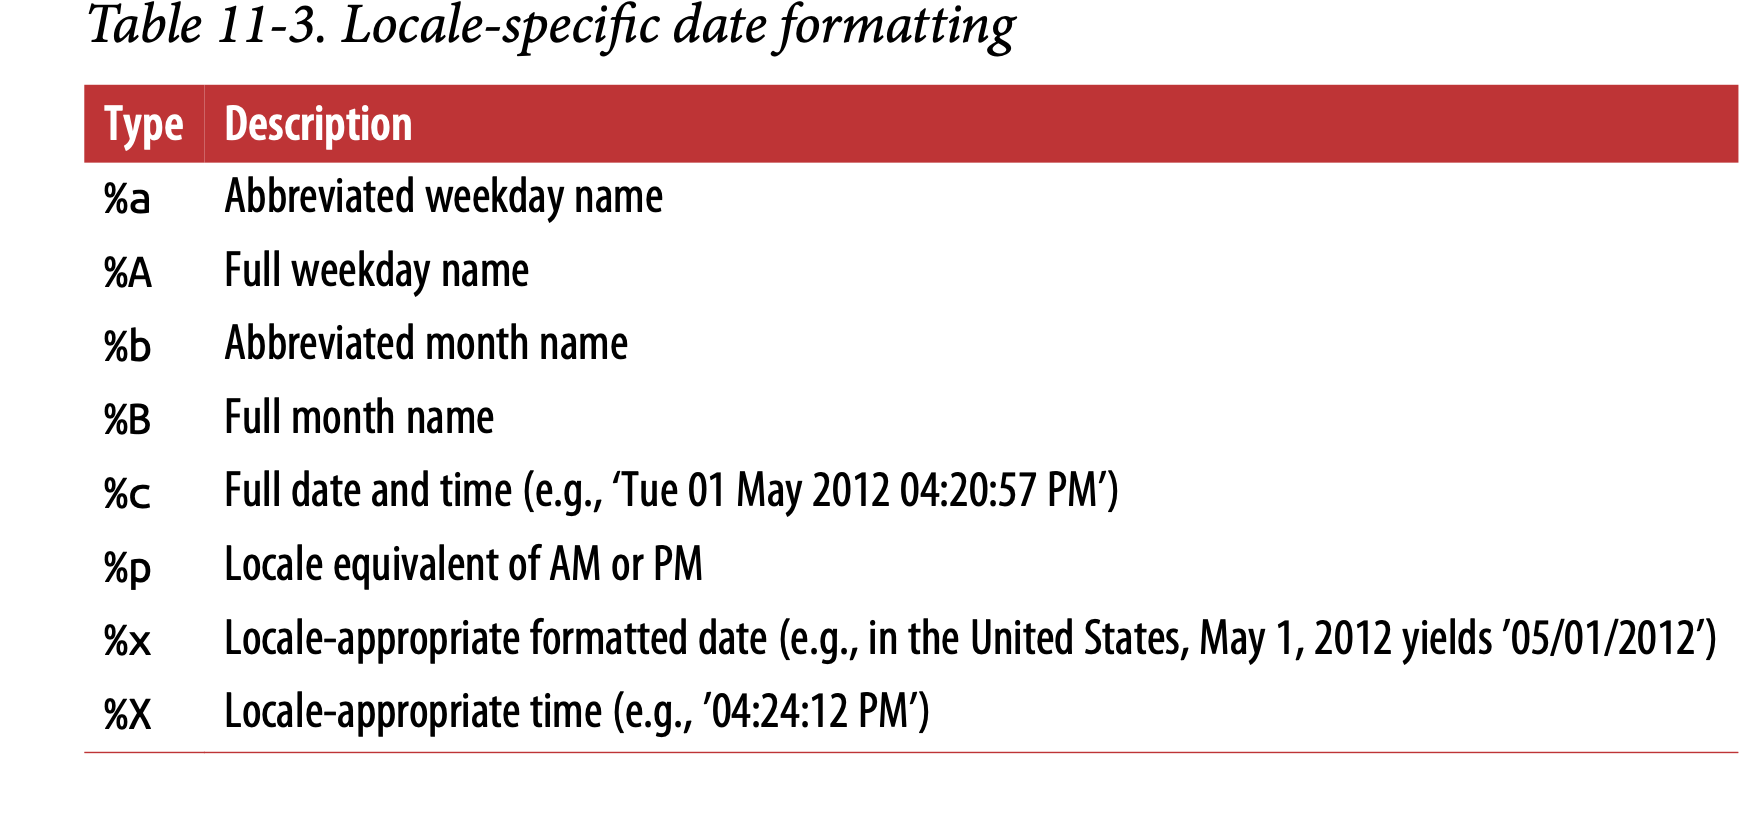

In [46]:
# dateutil.parser is an imperfect tool

TImeSeries Basics

In [2]:
import pandas as pd

In [3]:
from datetime import datetime
import numpy as np

dates= [datetime(2021,1,1), datetime(2021,1,5), datetime(2021,1,9), datetime(2011, 1, 8),
           datetime(2011, 1, 10), datetime(2011, 1, 12) ]

ts= pd.DataFrame(np.random.randn(6), index= dates,)
ts

,0
2021-01-01,-0.795144
2021-01-05,1.274848
2021-01-09,-1.082346
2011-01-08,-0.791194
2011-01-10,-1.079998
2011-01-12,-0.360893


In [4]:
ts.index.name= 'Date'
ts.index

DatetimeIndex(['2021-01-01', '2021-01-05', '2021-01-09', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [5]:
ts[::2]

,0
Date,
2021-01-01,-0.795144
2021-01-09,-1.082346
2011-01-10,-1.079998


In [7]:
ts+ts[::2] #addition with null leads to null

,0
Date,
2011-01-08,NaN
2011-01-10,-2.159996
2011-01-12,NaN
2021-01-01,-1.590287
2021-01-05,NaN
2021-01-09,-2.164692


In [62]:
ts.index.dtype

dtype('<M8[ns]')

In [63]:
ts.index[0]

Timestamp('2021-01-01 00:00:00')

Indexing, Selection and Subsetting

In [68]:
stamp= ts.index[2]
stamp

Timestamp('2021-01-09 00:00:00')

In [76]:
ts[ts.index== stamp], # ts[stamp] isn't working because ts is not a series here

,0
Date,
2021-01-09,1.340753


In [12]:
from datetime import datetime

In [13]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
     datetime(2011, 1, 7), datetime(2011, 1, 8),
     datetime(2011, 1, 10), datetime(2011, 1, 12)]
ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [83]:
ts[ts.index[0]]

0.03097334694804695

In [84]:
ts['1/10/2011']

0.27309187628524345

In [4]:
import pandas as pd
import numpy as np

In [5]:
longer_ts = pd.Series(np.random.rand(1000), index= pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.359778
2000-01-02    0.638449
2000-01-03    0.458956
2000-01-04    0.333665
2000-01-05    0.182103
                ...   
2002-09-22    0.194323
2002-09-23    0.709589
2002-09-24    0.670072
2002-09-25    0.152514
2002-09-26    0.229736
Freq: D, Length: 1000, dtype: float64

In [8]:
longer_ts['2001']

2001-01-01    0.648496
2001-01-02    0.112439
2001-01-03    0.925303
2001-01-04    0.260048
2001-01-05    0.387116
                ...   
2001-12-27    0.742188
2001-12-28    0.840377
2001-12-29    0.269457
2001-12-30    0.139525
2001-12-31    0.902607
Freq: D, Length: 365, dtype: float64

In [9]:
longer_ts['2001-5']

2001-05-01    0.392764
2001-05-02    0.262568
2001-05-03    0.565524
2001-05-04    0.460904
2001-05-05    0.581276
2001-05-06    0.574609
2001-05-07    0.645046
2001-05-08    0.605875
2001-05-09    0.014169
2001-05-10    0.003999
2001-05-11    0.416487
2001-05-12    0.724387
2001-05-13    0.778132
2001-05-14    0.310570
2001-05-15    0.812193
2001-05-16    0.785908
2001-05-17    0.109340
2001-05-18    0.120273
2001-05-19    0.228953
2001-05-20    0.432091
2001-05-21    0.974231
2001-05-22    0.447527
2001-05-23    0.998699
2001-05-24    0.962067
2001-05-25    0.088701
2001-05-26    0.799619
2001-05-27    0.771407
2001-05-28    0.029709
2001-05-29    0.631593
2001-05-30    0.192831
2001-05-31    0.383161
Freq: D, dtype: float64

In [14]:
ts[datetime(2011,1,7):]

2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [15]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
dtype: float64

As before, you can pass either a string date, datetime, or timestamp.\
Remember that slicing in this manner produces views on the source time series like slicing NumPy arrays.\
This means that no data is copied and modifications on the slice will be reflec‐ ted in the original data.

In [16]:
ts.truncate(after='1/9/2011')

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
dtype: float64

In [19]:
dates= pd.date_range('1/1/2000', periods=100, freq='W-SAT')
dates

DatetimeIndex(['2000-01-01', '2000-01-08', '2000-01-15', '2000-01-22',
               '2000-01-29', '2000-02-05', '2000-02-12', '2000-02-19',
               '2000-02-26', '2000-03-04', '2000-03-11', '2000-03-18',
               '2000-03-25', '2000-04-01', '2000-04-08', '2000-04-15',
               '2000-04-22', '2000-04-29', '2000-05-06', '2000-05-13',
               '2000-05-20', '2000-05-27', '2000-06-03', '2000-06-10',
               '2000-06-17', '2000-06-24', '2000-07-01', '2000-07-08',
               '2000-07-15', '2000-07-22', '2000-07-29', '2000-08-05',
               '2000-08-12', '2000-08-19', '2000-08-26', '2000-09-02',
               '2000-09-09', '2000-09-16', '2000-09-23', '2000-09-30',
               '2000-10-07', '2000-10-14', '2000-10-21', '2000-10-28',
               '2000-11-04', '2000-11-11', '2000-11-18', '2000-11-25',
               '2000-12-02', '2000-12-09', '2000-12-16', '2000-12-23',
               '2000-12-30', '2001-01-06', '2001-01-13', '2001-01-20',
      

In [20]:
long_df= pd.DataFrame(np.random.randn(100,4), columns=['a','b','c','d'], index=dates)

In [24]:
long_df.loc['2000-05-05'] #key error when value is not found

KeyError: '2000-05-05'

In [25]:
long_df.loc['2000-05-05':]

,a,b,c,d
2000-05-06,1.463765,0.401366,1.500104,-0.995242
2000-05-13,1.851727,-0.674718,0.946216,0.594915
2000-05-20,0.430122,-0.193967,-0.444590,-1.014311
2000-05-27,-0.337383,-1.147030,0.558976,1.336545
2000-06-03,-0.995045,0.002612,-1.018818,-0.940985
...,...,...,...,...
2001-10-27,0.501694,-0.835294,0.405388,0.939665
2001-11-03,-1.176917,2.012682,-0.148563,1.417264
2001-11-10,0.515430,0.700377,-0.531331,-0.233709
2001-11-17,-1.884253,0.708341,1.585795,-0.507890


Time Series with Duplicate Indices

In [26]:
dates= pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                        '1/2/2000', '1/3/2000'])

In [27]:
dup_ts= pd.Series(np.arange(5), index=dates)

In [28]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int64

In [30]:
dup_ts.index.is_unique

False

In [31]:
dup_ts.groupby(dup_ts.index).sum()

2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int64

In [32]:
dup_ts['1/2/2000']

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int64

In [35]:
dup_ts.groupby(level = 0 ).sum() #level=0: Groups the DataFrame based on the unique values in the first level of the index.


2000-01-01    0
2000-01-02    6
2000-01-03    4
dtype: int64

Generic time series in pandas are assumed to be irregular; that is, they have no fixed frequency. \
For many applications this is sufficient. However, \
it’s often desirable to work relative to a fixed frequency, such as daily, monthly, or every 15 minutes,\
 even if that means introducing missing values into a time series. Fortunately pandas has a full suite of standard time series frequencies \
 and tools for resampling, inferring fre‐ quencies, and generating fixed-frequency date ranges.\ For example, you can convert the sample time \
 series to be fixed daily frequency by calling resample:

In [36]:
ts

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [37]:
ts

2011-01-02   -1.241332
2011-01-05    0.234310
2011-01-07   -0.367414
2011-01-08   -1.655708
2011-01-10   -0.539142
2011-01-12    0.249016
dtype: float64

In [42]:
resampler= ts.resample('D') #later on these

Generating Date Ranges

In [50]:
from datetime import timedelta

In [53]:
index= pd.date_range('2022-01-01', datetime.now()-timedelta(days=1), freq='M')

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_678/4108868930.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index= pd.date_range('2022-01-01', datetime.now()-timedelta(days=1), freq='M')


In [54]:
index

DatetimeIndex(['2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31', '2023-11-30', '2023-12-31',
               '2024-01-31', '2024-02-29'],
              dtype='datetime64[ns]', freq='ME')

In [55]:
index= pd.date_range('2022-01-01', datetime.now()-timedelta(days=1), freq='D')

In [69]:
index= pd.date_range(start='2022-01-01', end=(datetime.now()-timedelta(days=1)), periods=20)

In [70]:
index

DatetimeIndex([          '2022-01-01 00:00:00',
               '2022-02-12 08:20:57.562538894',
               '2022-03-26 16:41:55.125077789',
               '2022-05-08 01:02:52.687616684',
               '2022-06-19 09:23:50.250155578',
               '2022-07-31 17:44:47.812694472',
               '2022-09-12 02:05:45.375233368',
               '2022-10-24 10:26:42.937772260',
               '2022-12-05 18:47:40.500311156',
               '2023-01-17 03:08:38.062850052',
               '2023-02-28 11:29:35.625388944',
               '2023-04-11 19:50:33.187927840',
               '2023-05-24 04:11:30.750466736',
               '2023-07-05 12:32:28.313005632',
               '2023-08-16 20:53:25.875544520',
               '2023-09-28 05:14:23.438083416',
               '2023-11-09 13:35:21.000622312',
               '2023-12-21 21:56:18.563161208',
               '2024-02-02 06:17:16.125700104',
                  '2024-03-15 14:38:13.688239'],
              dtype='datetime64[ns]', f

In [79]:
index= pd.date_range(start='2022-01-01', end= '2022-01-21', periods=20, normalize=True) #normalize doesn't work here
index

DatetimeIndex([          '2022-01-01 00:00:00',
               '2022-01-02 01:15:47.368421052',
               '2022-01-03 02:31:34.736842105',
               '2022-01-04 03:47:22.105263157',
               '2022-01-05 05:03:09.473684210',
               '2022-01-06 06:18:56.842105263',
               '2022-01-07 07:34:44.210526315',
               '2022-01-08 08:50:31.578947368',
               '2022-01-09 10:06:18.947368421',
               '2022-01-10 11:22:06.315789473',
               '2022-01-11 12:37:53.684210526',
               '2022-01-12 13:53:41.052631578',
               '2022-01-13 15:09:28.421052631',
               '2022-01-14 16:25:15.789473684',
               '2022-01-15 17:41:03.157894736',
               '2022-01-16 18:56:50.526315789',
               '2022-01-17 20:12:37.894736842',
               '2022-01-18 21:28:25.263157894',
               '2022-01-19 22:44:12.631578947',
                         '2022-01-21 00:00:00'],
              dtype='datetime64[ns]', f

In [75]:
index= pd.date_range(start='2022-01-01', periods=20)
index

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20'],
              dtype='datetime64[ns]', freq='D')

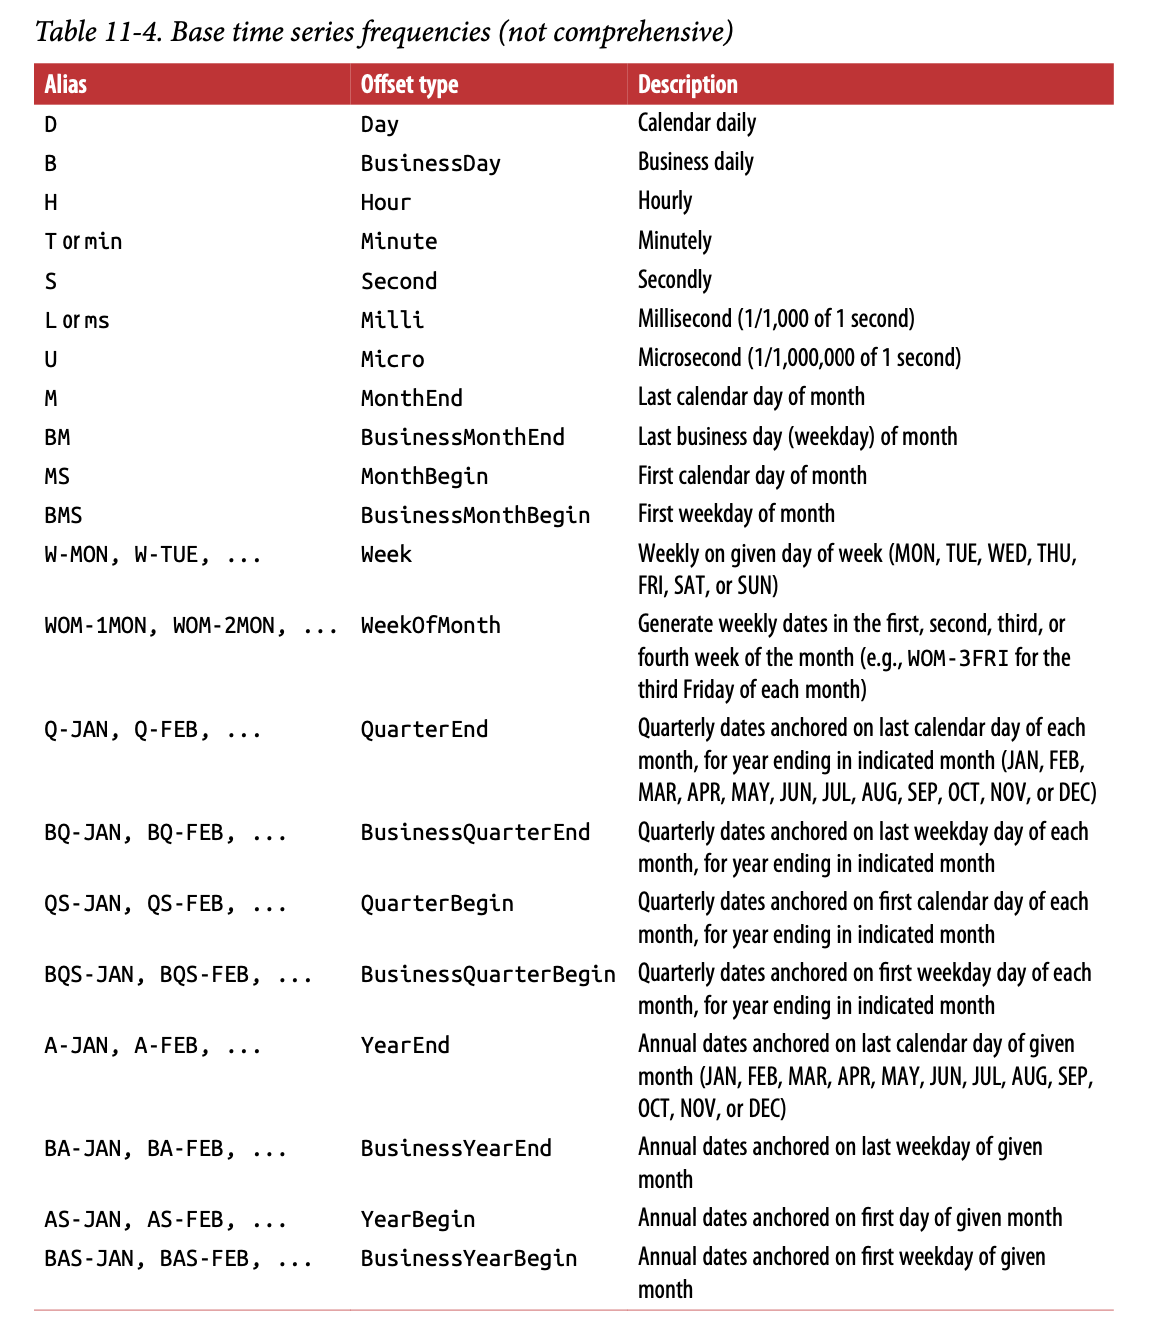

In [82]:
#frequencies above
pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True) #removes the time part

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

In [83]:
pd.date_range('2012-05-02 12:56:31', periods=5,) #preserves the timne part

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

11.3 Date Ranges, Frequencies, and Shifting

In [8]:
# While I used it previously without explanation, pandas.date_range is \
# responsible for generating a DatetimeIndex with an indicated length according to a particular frequency

In [9]:
index= pd.date_range('2022-04-01', '2023-04-01')
index

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10',
               ...
               '2023-03-23', '2023-03-24', '2023-03-25', '2023-03-26',
               '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
               '2023-03-31', '2023-04-01'],
              dtype='datetime64[ns]', length=366, freq='D')

In [12]:
index= pd.date_range(start='2022-04-01', periods=20)
index

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20'],
              dtype='datetime64[ns]', freq='D')

In [13]:
index= pd.date_range(start='2022-04-01', periods=20)
index

DatetimeIndex(['2022-04-01', '2022-04-02', '2022-04-03', '2022-04-04',
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-09', '2022-04-10', '2022-04-11', '2022-04-12',
               '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16',
               '2022-04-17', '2022-04-18', '2022-04-19', '2022-04-20'],
              dtype='datetime64[ns]', freq='D')

In [14]:
index= pd.date_range(end='2022-04-01', periods=20)
index

DatetimeIndex(['2022-03-13', '2022-03-14', '2022-03-15', '2022-03-16',
               '2022-03-17', '2022-03-18', '2022-03-19', '2022-03-20',
               '2022-03-21', '2022-03-22', '2022-03-23', '2022-03-24',
               '2022-03-25', '2022-03-26', '2022-03-27', '2022-03-28',
               '2022-03-29', '2022-03-30', '2022-03-31', '2022-04-01'],
              dtype='datetime64[ns]', freq='D')

In [16]:
index= pd.date_range(start='2022-04-01', end= '2023-04-01' ,freq='ME')
index

DatetimeIndex(['2022-04-30', '2022-05-31', '2022-06-30', '2022-07-31',
               '2022-08-31', '2022-09-30', '2022-10-31', '2022-11-30',
               '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31'],
              dtype='datetime64[ns]', freq='ME')

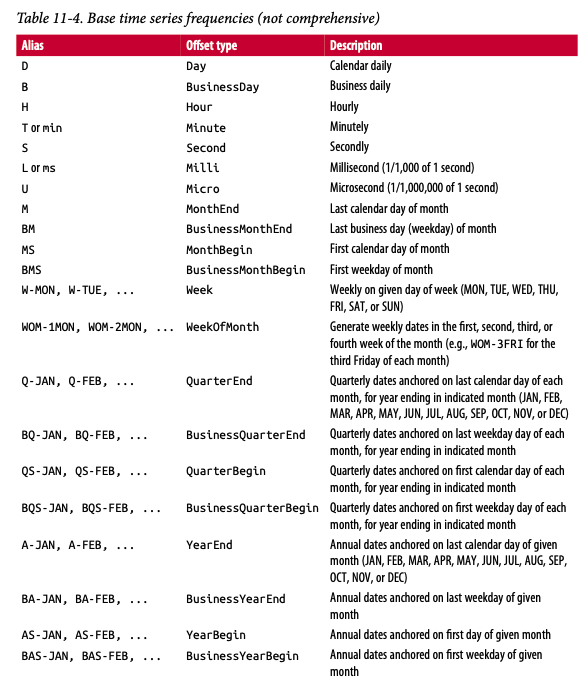

Frequencies and Date offsets

In [17]:
from pandas.tseries.offsets import Hour, Minute

hour= Hour()
four_hours= Hour(4)
four_hours

<4 * Hours>

In [18]:
pd.date_range('2000-01-01', periods=8, freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [19]:
pd.date_range('2000-01-01', periods=8, freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00'],
              dtype='datetime64[ns]', freq='4h')

In [20]:
pd.date_range('2000-01-01', periods=8, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00'],
              dtype='datetime64[ns]', freq='90min')

In [22]:
#Some frequencies describe points in time that are not evenly spaced. For example, 
# 'M' (calendar month end) and 'BM' (last business/weekday of month) depend on the number of days in a month and, in the latter case, 
# whether the month ends on a weekend or not.


Shifting (Leading and Lagging) Data

In [24]:
ts= pd.DataFrame(np.random.randn(8), index= pd.date_range('2020-03-03', periods=8, freq='D'))

In [25]:
ts

,0
2020-03-03,0.709597
2020-03-04,-1.790770
2020-03-05,-0.430323
2020-03-06,-1.226099
2020-03-07,0.309023
2020-03-08,0.839847
2020-03-09,-0.730108
2020-03-10,0.062836


In [26]:
ts.shift(1)

,0
2020-03-03,NaN
2020-03-04,0.709597
2020-03-05,-1.790770
2020-03-06,-0.430323
2020-03-07,-1.226099
2020-03-08,0.309023
2020-03-09,0.839847
2020-03-10,-0.730108


In [27]:
ts.shift(-1)

,0
2020-03-03,-1.790770
2020-03-04,-0.430323
2020-03-05,-1.226099
2020-03-06,0.309023
2020-03-07,0.839847
2020-03-08,-0.730108
2020-03-09,0.062836
2020-03-10,NaN


In [30]:
ts.shift(-7)

,0
2020-03-03,0.062836
2020-03-04,NaN
2020-03-05,NaN
2020-03-06,NaN
2020-03-07,NaN
2020-03-08,NaN
2020-03-09,NaN
2020-03-10,NaN


In [31]:
ts/ts.shift(1)-1

,0
2020-03-03,NaN
2020-03-04,-3.523645
2020-03-05,-0.759699
2020-03-06,1.849252
2020-03-07,-1.252038
2020-03-08,1.717746
2020-03-09,-1.869335
2020-03-10,-1.086064


In [32]:
ts.shift(1, freq='D') #removes the index with null values and add additional index where data is valid

,0
2020-03-04,0.709597
2020-03-05,-1.790770
2020-03-06,-0.430323
2020-03-07,-1.226099
2020-03-08,0.309023
2020-03-09,0.839847
2020-03-10,-0.730108
2020-03-11,0.062836


In [33]:
ts.shift(-7, freq= 'D')

,0
2020-02-25,0.709597
2020-02-26,-1.790770
2020-02-27,-0.430323
2020-02-28,-1.226099
2020-02-29,0.309023
2020-03-01,0.839847
2020-03-02,-0.730108
2020-03-03,0.062836


In [37]:
ts= pd.DataFrame(np.random.randn(8), index= pd.date_range('2020-03-03', periods=8, freq='M'))
ts

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_10466/2658488151.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts= pd.DataFrame(np.random.randn(8), index= pd.date_range('2020-03-03', periods=8, freq='M'))


,0
2020-03-31,0.473238
2020-04-30,-0.111043
2020-05-31,-0.141425
2020-06-30,0.411522
2020-07-31,0.581289
2020-08-31,0.883413
2020-09-30,0.607962
2020-10-31,-1.443561


In [38]:
ts.shift(3, freq= 'D')

,0
2020-04-03,0.473238
2020-05-03,-0.111043
2020-06-03,-0.141425
2020-07-03,0.411522
2020-08-03,0.581289
2020-09-03,0.883413
2020-10-03,0.607962
2020-11-03,-1.443561


Shifting dates with ofsets

In [39]:
from pandas.tseries.offsets import Day, MonthEnd

In [40]:
now= datetime(2011,2,2)

In [41]:
now+3*Day()

Timestamp('2011-02-05 00:00:00')

In [42]:
now+ MonthEnd(2)

Timestamp('2011-03-31 00:00:00')

In [43]:
now+ MonthEnd(-2)

Timestamp('2010-12-31 00:00:00')

In [50]:
offset= MonthEnd(1)
offset.rollback(now)


Timestamp('2011-01-31 00:00:00')

In [45]:
offset.rollforward(now)

Timestamp('2011-02-28 00:00:00')

In [48]:
ts = pd.Series(np.arange(20),

index=pd.date_range('1/15/2000', periods=20, freq='4d'))

In [49]:
ts

2000-01-15     0
2000-01-19     1
2000-01-23     2
2000-01-27     3
2000-01-31     4
2000-02-04     5
2000-02-08     6
2000-02-12     7
2000-02-16     8
2000-02-20     9
2000-02-24    10
2000-02-28    11
2000-03-03    12
2000-03-07    13
2000-03-11    14
2000-03-15    15
2000-03-19    16
2000-03-23    17
2000-03-27    18
2000-03-31    19
Freq: 4D, dtype: int64

In [51]:
ts.groupby(offset.rollforward).mean()

2000-01-31     2.0
2000-02-29     8.0
2000-03-31    15.5
dtype: float64

TIme Zone handling

In [53]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [55]:
pytz.timezone('America/New_York')

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

In [56]:
rng= pd.date_range('3/9/2023 9:30', periods=6, freq='D')

In [57]:
rng

DatetimeIndex(['2023-03-09 09:30:00', '2023-03-10 09:30:00',
               '2023-03-11 09:30:00', '2023-03-12 09:30:00',
               '2023-03-13 09:30:00', '2023-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [58]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2023-03-09 09:30:00    0.359522
2023-03-10 09:30:00    0.267176
2023-03-11 09:30:00    1.103356
2023-03-12 09:30:00   -1.293759
2023-03-13 09:30:00   -0.435911
2023-03-14 09:30:00    0.740138
Freq: D, dtype: float64

In [59]:
print(ts.index.tz)

None


In [63]:
date=pd.date_range('2023/08/09 9:30', periods= 6, freq='D', tz= 'UTC')

tss= pd.DataFrame(np.random.randn(len(date)), index= date)
tss

,0
2023-08-09 09:30:00+00:00,1.245960
2023-08-10 09:30:00+00:00,0.735405
2023-08-11 09:30:00+00:00,1.914898
2023-08-12 09:30:00+00:00,-0.610759
2023-08-13 09:30:00+00:00,0.456417
2023-08-14 09:30:00+00:00,-0.634122


In [64]:
ts_utc=ts.tz_localize('UTC')

In [65]:
ts_utc

2023-03-09 09:30:00+00:00    0.359522
2023-03-10 09:30:00+00:00    0.267176
2023-03-11 09:30:00+00:00    1.103356
2023-03-12 09:30:00+00:00   -1.293759
2023-03-13 09:30:00+00:00   -0.435911
2023-03-14 09:30:00+00:00    0.740138
Freq: D, dtype: float64

In [66]:
ts_utc.index

DatetimeIndex(['2023-03-09 09:30:00+00:00', '2023-03-10 09:30:00+00:00',
               '2023-03-11 09:30:00+00:00', '2023-03-12 09:30:00+00:00',
               '2023-03-13 09:30:00+00:00', '2023-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [67]:
ts_utc.tz_convert('America/New_York')

2023-03-09 04:30:00-05:00    0.359522
2023-03-10 04:30:00-05:00    0.267176
2023-03-11 04:30:00-05:00    1.103356
2023-03-12 05:30:00-04:00   -1.293759
2023-03-13 05:30:00-04:00   -0.435911
2023-03-14 05:30:00-04:00    0.740138
Freq: D, dtype: float64

In [ ]:
ts_eastern = ts.tz_localize('America/New_York')
ts_eastern.tz_convert('UTC')

In [69]:
stamp= pd.Timestamp('2011/01/01 14:00')

In [70]:
stamp_utc = stamp.tz_localize('utc')
stamp_utc

Timestamp('2011-01-01 14:00:00+0000', tz='UTC')

In [71]:
stamp_utc.tz_convert('Europe/Moscow')

Timestamp('2011-01-01 17:00:00+0300', tz='Europe/Moscow')

In [73]:
stamp= pd.Timestamp('2011/01/01 14:00', tz= 'Asia/Kolkata')

In [74]:
stamp

Timestamp('2011-01-01 14:00:00+0530', tz='Asia/Kolkata')

In [75]:
stamp_utc.value

1293890400000000000

In [76]:
from pandas.tseries.offsets import Hour

stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [77]:
stamp+Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [78]:
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [79]:
stamp+ Hour(2)

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

Operations between Dofferent Time Zones

In [80]:
rng

DatetimeIndex(['2023-03-09 09:30:00', '2023-03-10 09:30:00',
               '2023-03-11 09:30:00', '2023-03-12 09:30:00',
               '2023-03-13 09:30:00', '2023-03-14 09:30:00'],
              dtype='datetime64[ns]', freq='D')

In [81]:
ts

2023-03-09 09:30:00    0.359522
2023-03-10 09:30:00    0.267176
2023-03-11 09:30:00    1.103356
2023-03-12 09:30:00   -1.293759
2023-03-13 09:30:00   -0.435911
2023-03-14 09:30:00    0.740138
Freq: D, dtype: float64

In [86]:
ts1= ts[:7].tz_localize('Europe/Moscow')
ts2= ts1[2:].tz_convert('Asia/Kolkata')
ts1+ts2

2023-03-09 06:30:00+00:00         NaN
2023-03-10 06:30:00+00:00         NaN
2023-03-11 06:30:00+00:00    2.206712
2023-03-12 06:30:00+00:00   -2.587518
2023-03-13 06:30:00+00:00   -0.871822
2023-03-14 06:30:00+00:00    1.480277
dtype: float64

In [87]:
ts[:7]

2023-03-09 09:30:00    0.359522
2023-03-10 09:30:00    0.267176
2023-03-11 09:30:00    1.103356
2023-03-12 09:30:00   -1.293759
2023-03-13 09:30:00   -0.435911
2023-03-14 09:30:00    0.740138
Freq: D, dtype: float64

In [90]:
ts[2:]

2023-03-11 09:30:00    1.103356
2023-03-12 09:30:00   -1.293759
2023-03-13 09:30:00   -0.435911
2023-03-14 09:30:00    0.740138
Freq: D, dtype: float64

In [91]:
ts

2023-03-09 09:30:00    0.359522
2023-03-10 09:30:00    0.267176
2023-03-11 09:30:00    1.103356
2023-03-12 09:30:00   -1.293759
2023-03-13 09:30:00   -0.435911
2023-03-14 09:30:00    0.740138
Freq: D, dtype: float64

Periods and Period Arithmetic

In [94]:
p = pd.Period(2007, freq='Y-DEC')
# In this case, the Period object represents the full timespan from January 1, 2007, to December 31, 2007, inclusive.

In [95]:
p

Period('2007', 'Y-DEC')

In [96]:
p+5

Period('2012', 'Y-DEC')

In [97]:
p-5

Period('2002', 'Y-DEC')

In [99]:
pd.Period('2014', freq='Y-DEC')-p

<7 * YearEnds: month=12>

In [100]:
rng= pd.period_range('2020-02', '2020-09', freq='M')
pd.Series(np.random.rand(len(rng)), index=rng)

2020-02    0.535635
2020-03    0.903488
2020-04    0.443556
2020-05    0.368072
2020-06    0.786010
2020-07    0.543423
2020-08    0.211629
2020-09    0.902650
Freq: M, dtype: float64

Period Frequency Conversion

In [208]:
p= pd.Period('2007', freq='Y-DEC')
p

Period('2007', 'Y-DEC')

In [209]:
p.asfreq('M', how='start')

Period('2007-01', 'M')

In [210]:
p.asfreq('M', how='end')

Period('2007-12', 'M')

In [211]:
p= pd.Period('2007', freq='Y-MAR')

In [212]:
p.asfreq('M', how= 'end')

Period('2007-03', 'M')

In [107]:
p=pd.Period('Aug-2007', 'M')

In [108]:
p

Period('2007-08', 'M')

In [109]:
p.asfreq('Y-JUN')

Period('2008', 'Y-JUN')

In [121]:
rng= pd.period_range('2006', '2010', freq='Y-DEC')
rng

PeriodIndex(['2006', '2007', '2008', '2009', '2010'], dtype='period[Y-DEC]')

In [122]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2006   -1.139161
2007   -0.520113
2008   -1.284184
2009   -0.823456
2010    1.204285
Freq: Y-DEC, dtype: float64

In [124]:
ts.asfreq('M', how='start')

2006-01   -1.139161
2007-01   -0.520113
2008-01   -1.284184
2009-01   -0.823456
2010-01    1.204285
Freq: M, dtype: float64

Quarterly Period Frequencies

In [125]:
p= pd.Period( '2011Q2', freq= 'Q-JAN')
p

Period('2011Q2', 'Q-JAN')

In [126]:
p.asfreq('D', 'start')

Period('2010-05-01', 'D')

In [127]:
p.asfreq('D', 'end')

Period('2010-07-31', 'D')

Converting Timestamps to Periods(and Back)

In [131]:
rng= pd.date_range('2000/01/01', freq='MS', periods=23)
rng

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01', '2000-11-01', '2000-12-01',
               '2001-01-01', '2001-02-01', '2001-03-01', '2001-04-01',
               '2001-05-01', '2001-06-01', '2001-07-01', '2001-08-01',
               '2001-09-01', '2001-10-01', '2001-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [133]:
ts= pd.Series(np.random.randn(len(rng)), index= rng)
ts

2000-01-01    1.010318
2000-02-01   -3.355419
2000-03-01    0.718128
2000-04-01   -0.497819
2000-05-01    0.338264
2000-06-01    0.426328
2000-07-01    1.615407
2000-08-01    0.278066
2000-09-01    2.108149
2000-10-01    1.600792
2000-11-01   -0.219847
2000-12-01    0.928038
2001-01-01    1.078698
2001-02-01    0.835978
2001-03-01    1.175607
2001-04-01   -0.595762
2001-05-01   -0.018732
2001-06-01   -0.599441
2001-07-01   -0.573947
2001-08-01    0.758415
2001-09-01    1.006308
2001-10-01   -1.178091
2001-11-01    1.358678
Freq: MS, dtype: float64

In [134]:
pts= ts.to_period()
pts

2000-01    1.010318
2000-02   -3.355419
2000-03    0.718128
2000-04   -0.497819
2000-05    0.338264
2000-06    0.426328
2000-07    1.615407
2000-08    0.278066
2000-09    2.108149
2000-10    1.600792
2000-11   -0.219847
2000-12    0.928038
2001-01    1.078698
2001-02    0.835978
2001-03    1.175607
2001-04   -0.595762
2001-05   -0.018732
2001-06   -0.599441
2001-07   -0.573947
2001-08    0.758415
2001-09    1.006308
2001-10   -1.178091
2001-11    1.358678
Freq: M, dtype: float64

In [135]:
rng= pd.date_range('2020-01-01', periods= 13, freq= 'D')
rng

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13'],
              dtype='datetime64[ns]', freq='D')

In [136]:
ts2= pd.DataFrame(np.random.randn(len(rng)), index= rng)
ts2

,0
2020-01-01,-0.833660
2020-01-02,0.324763
2020-01-03,0.473737
2020-01-04,2.097273
2020-01-05,-0.499829
2020-01-06,0.638222
2020-01-07,1.415923
2020-01-08,-1.983972
2020-01-09,-1.467099
2020-01-10,-1.619939


In [137]:
ts2.to_period('M')

,0
2020-01,-0.833660
2020-01,0.324763
2020-01,0.473737
2020-01,2.097273
2020-01,-0.499829
2020-01,0.638222
2020-01,1.415923
2020-01,-1.983972
2020-01,-1.467099
2020-01,-1.619939


In [142]:
pts= ts2.to_period()
pts

,0
2020-01-01,-0.833660
2020-01-02,0.324763
2020-01-03,0.473737
2020-01-04,2.097273
2020-01-05,-0.499829
2020-01-06,0.638222
2020-01-07,1.415923
2020-01-08,-1.983972
2020-01-09,-1.467099
2020-01-10,-1.619939


In [143]:
pts.to_timestamp(how='end')

,0
2020-01-01 23:59:59.999999999,-0.833660
2020-01-02 23:59:59.999999999,0.324763
2020-01-03 23:59:59.999999999,0.473737
2020-01-04 23:59:59.999999999,2.097273
2020-01-05 23:59:59.999999999,-0.499829
2020-01-06 23:59:59.999999999,0.638222
2020-01-07 23:59:59.999999999,1.415923
2020-01-08 23:59:59.999999999,-1.983972
2020-01-09 23:59:59.999999999,-1.467099
2020-01-10 23:59:59.999999999,-1.619939


Creating a PeriodIndex from Arrays

In [144]:
data= pd.read_csv('example_files/macrodata.csv')         
data.head(5)  


,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [147]:
index= pd.PeriodIndex.from_fields(year= data.year , quarter= data.quarter, freq= 'Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [148]:
data.index=index

In [149]:
data.infl

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

Resampling and Frequency Conversion

In [150]:
# resample has a similar API to groupby; you call resample to group the data, then call an aggregation function

In [159]:
rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01    1.129853
2000-01-02    0.383691
2000-01-03    0.010560
2000-01-04    1.643062
2000-01-05   -0.798066
                ...   
2000-04-05   -1.876003
2000-04-06    0.694641
2000-04-07    1.748444
2000-04-08   -0.347480
2000-04-09    0.014831
Freq: D, Length: 100, dtype: float64

In [153]:
ts.resample('MS').mean()

2000-01-01   -0.275639
2000-02-01   -0.040526
2000-03-01    0.225107
2000-04-01   -0.156862
Freq: MS, dtype: float64

In [157]:
ts.resample('ME', kind= 'period').agg({'summmation':'sum', 'maximum': 'max'})

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_10466/2375185883.py:1: FutureWarning: The 'kind' keyword in Series.resample is deprecated and will be removed in a future version. Explicitly cast the index to the desired type instead
  ts.resample('ME', kind= 'period').agg({'summmation':'sum', 'maximum': 'max'})


,summmation,maximum
2000-01,-8.544802,1.944533
2000-02,-1.175245,1.518335
2000-03,6.978317,1.728628
2000-04,-1.411757,0.250811


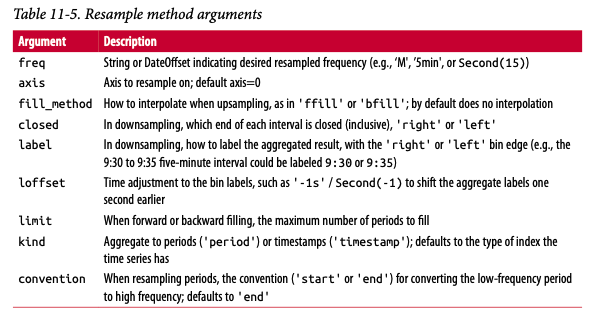

In [158]:
# Assuming ts is your time series
ts.index = pd.to_datetime(ts.index)  # Ensure index is datetime type
ts.resample('ME').agg({'summmation':'sum', 'maximum': 'max'})


,summmation,maximum
2000-01-31,-8.544802,1.944533
2000-02-29,-1.175245,1.518335
2000-03-31,6.978317,1.728628
2000-04-30,-1.411757,0.250811


Downsampling

In [184]:
rng = pd.date_range('2000-01-01', periods=12, freq='min')
ts = pd.Series(np.arange(4,16), index=rng)

In [186]:
ts

2000-01-01 00:00:00     4
2000-01-01 00:01:00     5
2000-01-01 00:02:00     6
2000-01-01 00:03:00     7
2000-01-01 00:04:00     8
2000-01-01 00:05:00     9
2000-01-01 00:06:00    10
2000-01-01 00:07:00    11
2000-01-01 00:08:00    12
2000-01-01 00:09:00    13
2000-01-01 00:10:00    14
2000-01-01 00:11:00    15
Freq: min, dtype: int64

In [192]:
4+5+6+7+8

30

In [193]:
ts.resample('5min').sum() #default for closed and labbel is 'left'

2000-01-01 00:00:00    30
2000-01-01 00:05:00    55
2000-01-01 00:10:00    29
Freq: 5min, dtype: int64

In [194]:
ts.resample('5min', label= 'right').sum()

2000-01-01 00:05:00    30
2000-01-01 00:10:00    55
2000-01-01 00:15:00    29
Freq: 5min, dtype: int64

In [195]:
ts.resample('5min', closed= 'right').sum() #here label is 'left' that , closed is right. No data of 1999-12-31 23:55:00   is included

1999-12-31 23:55:00     4
2000-01-01 00:00:00    35
2000-01-01 00:05:00    60
2000-01-01 00:10:00    15
Freq: 5min, dtype: int64

In [199]:
ts.resample('5min', closed= 'right', label= 'right').sum()

2000-01-01 00:00:00     4
2000-01-01 00:05:00    35
2000-01-01 00:10:00    60
2000-01-01 00:15:00    15
Freq: 5min, dtype: int64

In [202]:
ts.resample('5min', closed= 'right', label= 'right').sum() #loffset='-1s' is no longer supported

2000-01-01 00:00:00     4
2000-01-01 00:05:00    35
2000-01-01 00:10:00    60
2000-01-01 00:15:00    15
Freq: 5min, dtype: int64

In [203]:
ts.resample('5min', closed= 'left', label= 'right').sum()

2000-01-01 00:05:00    30
2000-01-01 00:10:00    55
2000-01-01 00:15:00    29
Freq: 5min, dtype: int64

In [168]:
6+7+8+9+10

40

In [171]:
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5min, dtype: int64

In [172]:
ts.resample('5min', closed='right').sum()

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5min, dtype: int64

In [204]:
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,4,8,4,8
2000-01-01 00:05:00,9,13,9,13
2000-01-01 00:10:00,14,15,14,15


In [205]:
frame = pd.DataFrame(np.random.randn(2,4), index= pd.date_range('1/1/2000', periods= 2, freq='W-WED'), columns=['a','b','c','d'])
frame

,a,b,c,d
2000-01-05,0.526661,-0.632498,-0.751303,-0.686079
2000-01-12,1.440768,0.899785,-1.587559,-1.194106


In [207]:
frame.resample('D').asfreq()

,a,b,c,d
2000-01-05,0.526661,-0.632498,-0.751303,-0.686079
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,1.440768,0.899785,-1.587559,-1.194106


Resample with Periods

In [246]:
frame= pd.DataFrame(np.random.randn(24,4)
                    , index= pd.period_range('2020-01', '2021-12', freq='M')
                    , columns= ['aa', 'bb','cc','dd'])

In [247]:
frame

,aa,bb,cc,dd
2020-01,-0.755317,0.899015,-2.150477,0.800293
2020-02,0.986964,-1.066591,1.371404,-0.650141
2020-03,0.983924,-0.972584,0.865245,0.612276
2020-04,1.198881,0.438747,-1.182810,-0.063336
2020-05,1.625246,-0.163289,-0.272714,0.454211
2020-06,-1.631735,-0.517294,-0.463363,0.843396
2020-07,0.461456,-1.182110,-0.923583,-1.170011
2020-08,-1.468184,1.229445,-0.829459,1.466094
2020-09,-0.922696,0.386249,1.150707,-0.267665
2020-10,2.326288,0.770612,0.052198,0.896678


In [228]:
frame.index= frame.index.to_timestamp()

In [248]:
# frame.index= pd.to_datetime(frame.index)
frame.resample('Y-DEC').mean()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_10466/1067274835.py:2: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  frame.resample('Y-DEC').mean()


,aa,bb,cc,dd
2020,0.464941,-0.137425,-0.145793,0.039697
2021,0.157467,0.425219,-0.236228,0.001963


In [250]:
annual_frame= frame.resample('Y-DEC').mean()
annual_frame

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_10466/2205961598.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame= frame.resample('Y-DEC').mean()


,aa,bb,cc,dd
2020,0.464941,-0.137425,-0.145793,0.039697
2021,0.157467,0.425219,-0.236228,0.001963


In [251]:
annual_frame.resample('Q-DEC').ffill()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_10466/2878672077.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC').ffill()


,aa,bb,cc,dd
2020Q1,0.464941,-0.137425,-0.145793,0.039697
2020Q2,0.464941,-0.137425,-0.145793,0.039697
2020Q3,0.464941,-0.137425,-0.145793,0.039697
2020Q4,0.464941,-0.137425,-0.145793,0.039697
2021Q1,0.157467,0.425219,-0.236228,0.001963
2021Q2,0.157467,0.425219,-0.236228,0.001963
2021Q3,0.157467,0.425219,-0.236228,0.001963
2021Q4,0.157467,0.425219,-0.236228,0.001963


In [253]:
annual_frame.resample('Q-DEC', convention='e').ffill()

/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_10466/166709267.py:1: FutureWarning: The 'convention' keyword in DataFrame.resample is deprecated and will be removed in a future version. Explicitly cast PeriodIndex to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC', convention='e').ffill()
/var/folders/jm/7qcz1nys2_l6rk66dc2f48wc0000gn/T/ipykernel_10466/166709267.py:1: FutureWarning: Resampling with a PeriodIndex is deprecated. Cast index to DatetimeIndex before resampling instead.
  annual_frame.resample('Q-DEC', convention='e').ffill()


,aa,bb,cc,dd
2020Q4,0.464941,-0.137425,-0.145793,0.039697
2021Q1,0.464941,-0.137425,-0.145793,0.039697
2021Q2,0.464941,-0.137425,-0.145793,0.039697
2021Q3,0.464941,-0.137425,-0.145793,0.039697
2021Q4,0.157467,0.425219,-0.236228,0.001963


In [235]:
annual_frame.index

DatetimeIndex(['2020-12-31', '2021-12-31'], dtype='datetime64[ns]', freq='YE-DEC')

Moving windows function

In [3]:
import pandas as pd

In [6]:
close_ps_all= pd.read_csv('example_files/stock_px.csv', parse_dates= True , index_col=0)
close_ps_all

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


In [7]:
close_px= close_ps_all.resample('B').ffill()
close_px

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93
...,...,...,...,...
2011-10-10,388.81,26.94,76.28,1194.89
2011-10-11,400.29,27.00,76.27,1195.54
2011-10-12,402.19,26.96,77.16,1207.25
2011-10-13,408.43,27.18,76.37,1203.66


<Axes: >

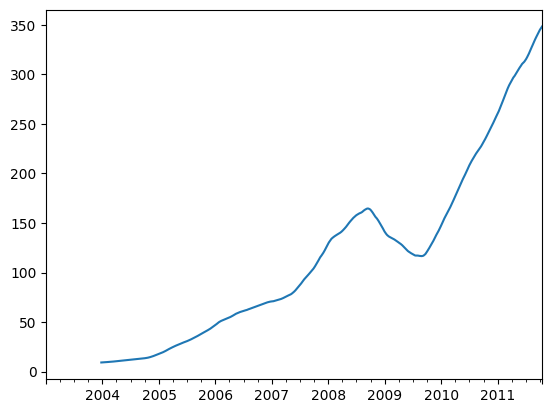

In [12]:
close_px.AAPL.rolling(256).mean().plot()


In [14]:
import matplotlib as plt

In [17]:
close_px.AAPL.rolling(256, min_periods=10).mean()

2003-01-02           NaN
2003-01-03           NaN
2003-01-06           NaN
2003-01-07           NaN
2003-01-08           NaN
                 ...    
2011-10-10    346.721797
2011-10-11    347.043242
2011-10-12    347.405352
2011-10-13    347.787773
2011-10-14    348.227148
Freq: B, Name: AAPL, Length: 2292, dtype: float64

In the context of your code close_px.AAPL.rolling(256, min_periods=10).mean(), it means that the rolling window will start calculating the mean only after it has accumulated at least 10 non-null values.

<Axes: >

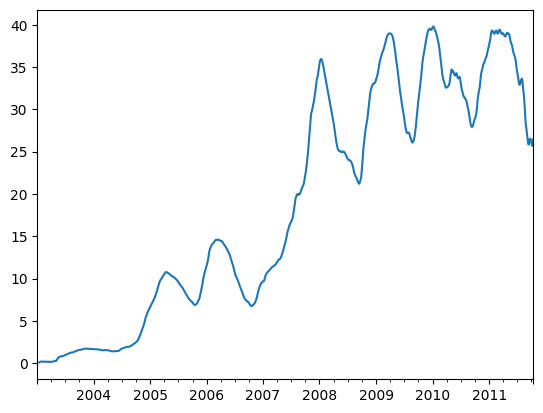

In [19]:
close_px.AAPL.rolling(256, min_periods=10).std().plot()

<Axes: >

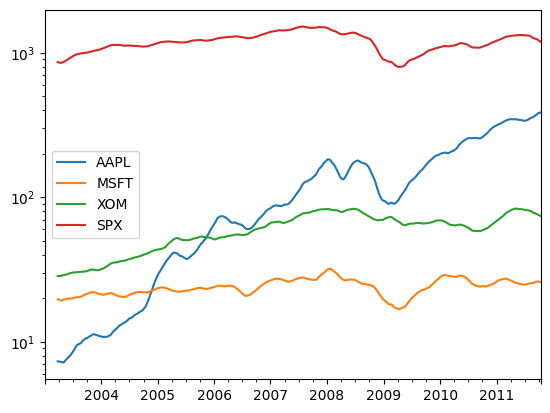

In [20]:
close_px.rolling(60).mean().plot(logy=True)

In [21]:
close_px.rolling('2D').mean()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.400,21.110,29.220,909.030
2003-01-03,7.425,21.125,29.230,908.810
2003-01-06,7.450,21.520,29.960,929.010
2003-01-07,7.440,21.725,29.455,925.970
2003-01-08,7.355,21.620,28.890,916.430
...,...,...,...,...
2011-10-10,388.810,26.940,76.280,1194.890
2011-10-11,394.550,26.970,76.275,1195.215
2011-10-12,401.240,26.980,76.715,1201.395
2011-10-13,405.310,27.070,76.765,1205.455


<Axes: >

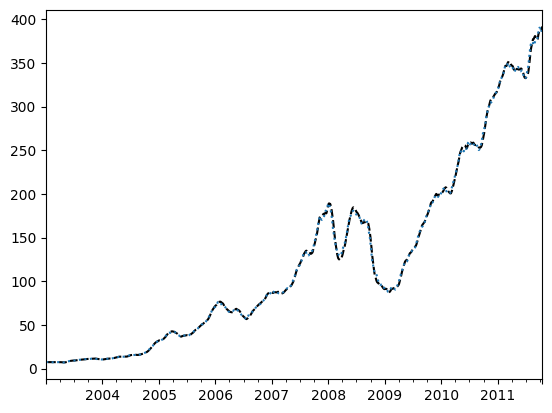

In [30]:
ma60= close_px.AAPL.rolling(30, min_periods=10).mean()
ewma60= close_px.AAPL.ewm(span=30).mean()

ma60.plot(style='k--', label= 'Simple MA')
ewma60.plot(style=':', label= 'EW MA')
# plt.legend()

In [31]:
returns= close_px.pct_change()

In [33]:
returns

,AAPL,MSFT,XOM,SPX
2003-01-02,NaN,NaN,NaN,NaN
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
...,...,...,...,...
2011-10-10,0.051406,0.026286,0.036977,0.034125
2011-10-11,0.029526,0.002227,-0.000131,0.000544
2011-10-12,0.004747,-0.001481,0.011669,0.009795
2011-10-13,0.015515,0.008160,-0.010238,-0.002974


<Axes: >

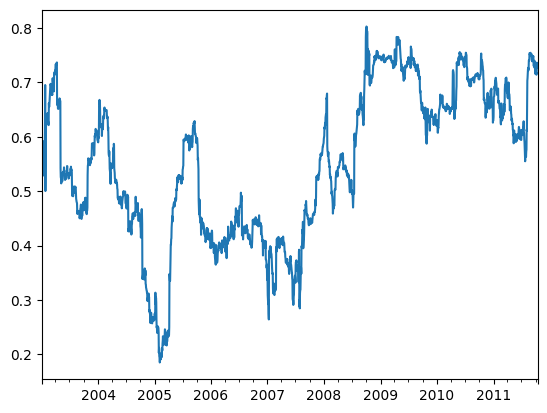

In [34]:
corr= returns.AAPL.rolling(125, min_periods=10).corr(returns.SPX)
corr.plot()

<Axes: >

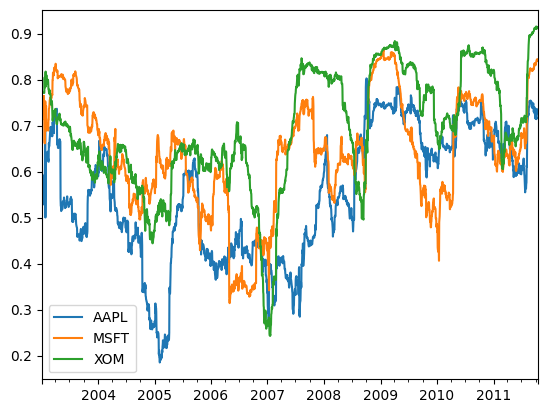

In [36]:
corr= returns[['AAPL', 'MSFT', 'XOM']].rolling(125, min_periods=10).corr(returns.SPX)
corr.plot()